In [133]:
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
# Read the CSV file
df_user = pd.read_csv('/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/includes/Demand/user_demand_cambridge_oct7_2019_week.csv')
df_food= pd.read_csv('/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/includes/Demand/food_demand_cambridge_week.csv')

In [138]:

# Extract the day from the 'starttime' column
df_user['day'] = pd.to_datetime(df_user['starttime']).dt.day - 6

# Round down 'start_time' column to nearest 15 minutes
df_food['start_time_ed'] = pd.to_datetime(df_food['start_time']).dt.floor('15Min')
df_user['start_time_ed'] = pd.to_datetime(df_user['starttime']).dt.floor('15Min')

# Group the data by day and 15-minute intervals and count the number of rows
counts_food = df_food.groupby(['day', 'start_time_ed']).size().reset_index(name='count')
counts_user = df_user.groupby(['day', 'start_time_ed']).size().reset_index(name='count')

# Create a DataFrame with one row every 15 minutes for 7 days
days = pd.date_range(start=df_user['start_time_ed'].min(), periods=7, freq='D')
time_intervals = pd.date_range(start='00:00:00', end='23:59:59', freq='15Min')
index = pd.MultiIndex.from_product([days, time_intervals], names=['day', 'start_time_ed'])
df_counts_food = pd.DataFrame(index=index).reset_index()
df_counts_user = pd.DataFrame(index=index).reset_index()

# Convert 'day' column in counts_food to match data type in df_counts_food
counts_food['day'] = counts_food['day'].astype(int)
counts_user['day'] = counts_user['day'].astype(int)
# Convert 'start_time_ed' column in counts_user to datetime
counts_user['start_time_ed'] = pd.to_datetime(counts_user['start_time_ed'])
counts_food['start_time_ed'] = pd.to_datetime(counts_food['start_time_ed'])

# Merge the counts with the complete DataFrame to fill missing values with zeros
df_counts_food = pd.merge(df_counts_food, counts_food, how='left', on=['day', 'start_time_ed']).fillna(0)
df_counts_user = pd.merge(df_counts_user, counts_user, how='left', on=['day', 'start_time_ed']).fillna(0)

# Format the datetime columns
df_counts_food['x_datetime'] = df_counts_food['day'].astype(str) + ', ' + df_counts_food['start_time_ed'].dt.strftime('%H:%M:%S')
df_counts_user['x_datetime'] = df_counts_user['day'].astype(str) + ', ' + df_counts_user['start_time_ed'].dt.strftime('%H:%M:%S')


ValueError: You are trying to merge on datetime64[ns] and int64 columns. If you wish to proceed you should use pd.concat

In [ ]:
counts_user.to_csv("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/preprocessing/user_test.csv", index=False)
counts_food.to_csv("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/preprocessing/food_test.csv", index=False)

In [131]:
# Extract the day from the 'starttime' column
df_user['day'] = pd.to_datetime(df_user['starttime']).dt.day
df_user['day'] = df_user['day'] - 6

df_food['start_time'] = pd.to_datetime(df_food['start_time'])
df_user['start_time_ed'] = pd.to_datetime(df_user['starttime'])

# Remove fractional seconds from 'start_time_ed' column
df_user['start_time_ed'] = df_user['start_time_ed'].dt.floor('s')

# Group the data by day and 15-minute intervals and count the number of rows
counts_food = df_food.groupby(['day', pd.Grouper(key='start_time', freq='15Min')]).size().reset_index(name='count')
counts_user = df_user.groupby(['day', pd.Grouper(key='start_time_ed', freq='15Min')]).size().reset_index(name='count')


counts_food['x_time'] = counts_food['start_time'].dt.strftime('%H:%M:%S')
counts_user['x_time'] = counts_user['start_time_ed'].dt.strftime('%H:%M:%S')


# Combine day and x_time columns into a single datetime column
counts_user['x_datetime'] = counts_user['day'].astype(str) + ', ' + counts_user['x_time']
counts_food['x_datetime'] = counts_food['day'].astype(str) + ', ' + counts_food['x_time']


In [132]:

# Step 1: Generate a list of all 15-minute intervals in the 7-day period
start_date = pd.to_datetime('2023-06-21')  # Start date of the 7-day period
end_date = start_date + pd.DateOffset(days=6)  # End date of the 7-day period
time_intervals = pd.date_range(start=start_date, end=end_date, freq='15Min')

# Step 2: Expand the counts_user DataFrame
expanded_counts_user = pd.DataFrame({'x_datetime': time_intervals})

# Expand the counts_food DataFrame
expanded_counts_food = pd.DataFrame({'x_datetime': time_intervals})

# Step 3: Merge the expanded DataFrames with the original counts_user and counts_food DataFrames
counts_user = expanded_counts_user.merge(counts_user, on=['x_datetime'], how='left')
#counts_user['count'].fillna(0, inplace=True)

counts_food = expanded_counts_food.merge(counts_food, on=['x_datetime'], how='left')
#counts_food['count'].fillna(0, inplace=True)

ValueError: You are trying to merge on datetime64[ns] and object columns. If you wish to proceed you should use pd.concat

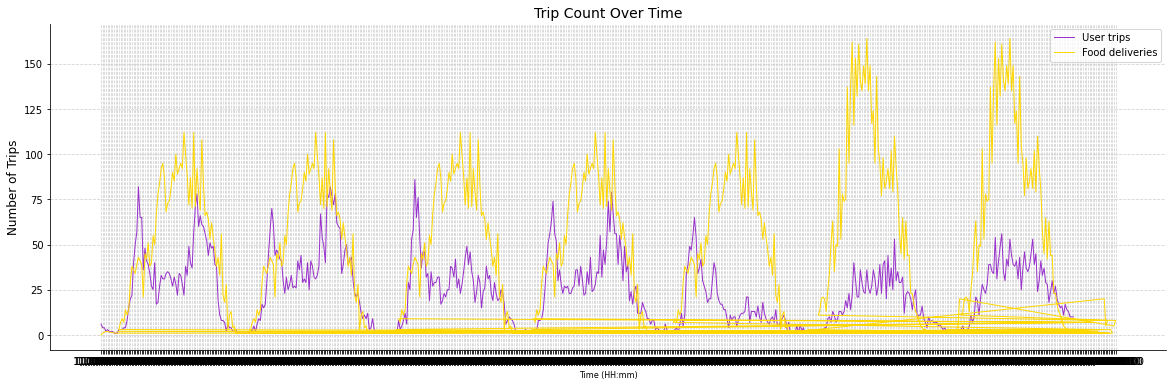

In [114]:
# Extract the day from the 'starttime' column
df_user['day'] = pd.to_datetime(df_user['starttime']).dt.day
df_user['day'] = df_user['day'] - 6

df_food['start_time'] = pd.to_datetime(df_food['start_time'])
df_user['start_time_ed'] = pd.to_datetime(df_user['starttime'])

# Remove fractional seconds from 'start_time_ed' column
df_user['start_time_ed'] = df_user['start_time_ed'].dt.floor('s')

# Group the data by day and 15-minute intervals and count the number of rows
counts_food = df_food.groupby(['day', pd.Grouper(key='start_time', freq='15Min')]).size().reset_index(name='count')
counts_user = df_user.groupby(['day', pd.Grouper(key='start_time_ed', freq='15Min')]).size().reset_index(name='count')


counts_food['x_time'] = counts_food['start_time'].dt.strftime('%H:%M:%S')
counts_user['x_time'] = counts_user['start_time_ed'].dt.strftime('%H:%M:%S')


# Combine day and x_time columns into a single datetime column
counts_user['x_datetime'] = counts_user['day'].astype(str) + ', ' + counts_user['x_time']
counts_food['x_datetime'] = counts_food['day'].astype(str) + ', ' + counts_food['x_time']

# Add a new row with 0 count at 0:00
new_row = pd.DataFrame({'x_datetime': ['1, 00:00:00'], 'count': [0]})
counts_food = pd.concat([new_row, counts_food], ignore_index=True)

# Remove duplicates and inconsistencies from counts_food DataFrame
#counts_food = counts_food.drop_duplicates(subset=['x_datetime'])
#counts_food = counts_food.sort_values('x_datetime')

# Create a plot
plt.figure(figsize=(20, 6))
plt.plot(counts_user['x_datetime'], counts_user['count'], linewidth=1, color='darkorchid')
plt.plot(counts_food['x_datetime'], counts_food['count'], linewidth=1, color='gold')

# Set the axis labels and title
plt.xlabel('Time (HH:mm)', fontsize=8)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Trip Count Over Time', fontsize=14)

# Customize the grid
plt.grid(color='lightgray', linestyle='--')

# Customize the plot background and border
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust the tick parameters
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Add a legend if needed
plt.legend(['User trips','Food deliveries'], loc='best')

# Adjust the layout for better spacing
#plt.tight_layout()

# Display the plot
plt.show()